In [1]:
import time
import pandas as pd
import numpy as np
import util
import pyBigWig
import seaborn as sns
import glob
from matplotlib_venn import venn2,venn3
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
tic=time.time()

In [2]:
h=pd.read_csv('data/h.csv',index_col=0)
len(h)

2475176

In [3]:
for n in ['y','o']:
    path='data/meth/t/'+n+'.bw'
    bw=pyBigWig.open(path)
    h['t'+n]=h.apply(lambda x: bw.stats(x['ch'],x['b'],x['e'],'mean',exact=True)[0],axis=1)
h['td']=h['to']-h['ty']
pl=h[['ezg','ty','to']].melt('ezg')
pl.columns=['ezg','T cell','value']
print(pl.head(1))
pl['T cell']=pl['T cell'].replace({'ty':'Young','to':'Old'})

ValueError: Wrong number of items passed 0, placement implies 1

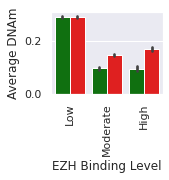

In [4]:
sns.set(rc={'figure.figsize':(2,1.5)})
ax=sns.barplot(data=pl,x='ezg',y='value',hue='T cell',palette=["green", "red"]);
ax.legend_.remove()
ax.set(xlabel='EZH Binding Level', ylabel='Average DNAm');
plt.xticks(rotation=90);

In [21]:
print(len(h[h.ezg=='High']),len(h[h.ezg=='High'][h.td>0]))

1035 972


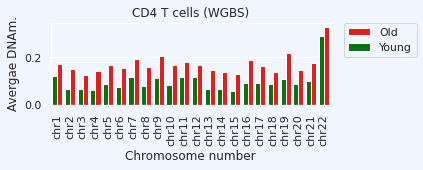

In [50]:
pl=h[h.ez>100].groupby('ch')[['ty','to']].mean()
pl.columns=['Young','Old']
pl['chr']=pl.index
pl['chn']=pl.chr.str[3:].astype(int)
pl=pl.sort_values('chn').drop('chn',axis=1)
pl=pl.melt(id_vars='chr')
sns.set(rc={'axes.facecolor':'#f1f5fd','figure.facecolor':'#f1f5fd','figure.figsize':(5,1.5)})
ax=sns.barplot(data=pl,x='chr',y='value',hue='variable',palette=["green", "red"]);
labels=['Newborn',
        'Centenarian']
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ax.set_xlabel('Chromosome number')#,fontsize=10);
ax.set_ylabel('Avergae DNAm.')#,fontsize=10);
ax.set_title('CD4 T cells (WGBS)');#,fontsize=12);
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Age', ylabel='Average DNAm'>

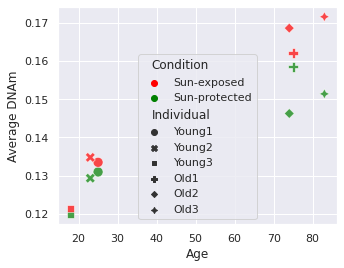

In [18]:
sp=['SRR10429'+ i for i in  ['03','06','07','09','11','13']]
se=['SRR10429'+ i for i in  ['04','05','08','10','12','14']]
sep=sp+se
for sn in sep:
    path='data/meth/s/'+sn+'.bw'
    bw=pyBigWig.open(path)
    h[sn]=h.apply(lambda x: bw.stats(x['ch'],x['b'],x['e'],'mean',exact=True)[0],axis=1)
hz=h[h.ezg=='High']
p=pd.DataFrame(hz[sep].mean())
p['age']=[25,23,18,75,74,83]+[25,23,18,75,74,83]
p['g']= ['Sun-protected']*6+['Sun-exposed']*6
p['indivudal']=2*['Young1','Young2','Young3','Old1','Old2','Old3']
p.columns=['Average DNAm','Age','Condition','Individual']
fig, ax = plt.subplots(figsize=(5,4))
sns.scatterplot(data=p,x='Age',y='Average DNAm',hue='Condition',hue_order=['Sun-exposed','Sun-protected'],
                palette=['red','green'],markers=True, style='Individual',s=100,alpha=.7)

In [ ]:
fyo=['Young-381','Young-400','Young-498','Old-247','Old-602','Old-725']
for sn in fyo:
    path='data/meth/f/yo/'+sn+'.bw'
    bw=pyBigWig.open(path)
    h[sn]=h.apply(lambda x: bw.stats(x['ch'],x['b'],x['e'],'mean',exact=True)[0],axis=1)
hz=h[h.ezg=='High']
p=pd.DataFrame(hz[fyo].mean())
p['Age']=3*['Young']+3*['Old']

[Text(0, 0.5, 'Average DNAm')]

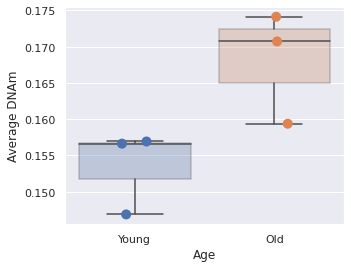

In [25]:
fig, ax = plt.subplots(figsize=(5,4))
ax=sns.boxplot(data=p,x='Age',y=0,boxprops=dict(alpha=.3))
ax=sns.stripplot(data=p,x='Age',y=0,marker=".",size=20)
ax.set( ylabel='Average DNAm')

              Average DNAm  Passage
Average DNAm       1.00000  0.99991
Passage            0.99991  1.00000


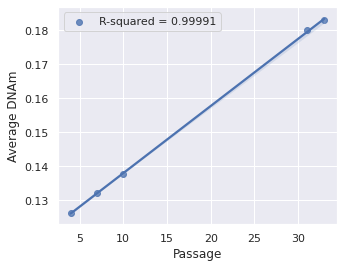

In [23]:
fs=['SRR3264'+str(i) for i in [413,414,415,416,722]]
for sn in fs:
    path='data/meth/f/'+sn+'.bw'
    bw=pyBigWig.open(path)
    h[sn]=h.apply(lambda x: bw.stats(x['ch'],x['b'],x['e'],'mean',exact=True)[0],axis=1)
hz=h[h.ezg=='High']
p=pd.DataFrame(hz[fs].mean())
p['Passage']=[4,7,10,31,33]
p.columns=['Average DNAm','Passage']#,'Condition','Individual']
fig, ax = plt.subplots(figsize=(5,4))
ax=sns.regplot(data=p,x='Passage',y='Average DNAm',label='R-squared = 0.99991')
ax.legend(loc="best")    
print(p.corr())